In [1]:
import pandas as pd
from pathlib import Path
import random
import torch_geometric

In [2]:
import sys
import os
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
parent_parent_dir = os.path.dirname(parent_dir)

sys.path.append(parent_dir)
sys.path.append(parent_parent_dir)

from DataPipeline.preprocessing import process_encode_graph, get_subgraph_with_terminal_nodes_step, torch_geometric_to_networkx, plot_graph
from utils import sample_random_subgraph_ZINC, sample_first_atom, get_model_GNN1, get_model_GNN2, get_model_GNN3, get_optimizer, one_step, create_torch_graph_from_one_atom, load_model


In [3]:
zinc_path = Path('rndm_zinc_drugs_clean_3.csv')
zinc_df = pd.read_csv(zinc_path)

In [4]:
graph = create_torch_graph_from_one_atom(sample_first_atom())
#batch graph 
batch_graph = torch_geometric.data.Batch.from_data_list([graph])

In [5]:
graph, terminal, id_map = sample_random_subgraph_ZINC(zinc_df, 1)
batch = torch_geometric.data.Batch.from_data_list([graph])

In [6]:
sample_first_atom()

'6'

In [7]:
batch

DataBatch(x=[1, 7], edge_index=[0], edge_attr=[0, 4], batch=[1], ptr=[2])

In [8]:
GNN1_path = Path('..') / 'Train' / 'GNN1' / 'checkpoint_epoch_41_GNN1.pt'
GNN2_path = Path('..') / 'Train' / 'GNN2' / 'checkpoint_epoch_111_GNN2_test.pt'
GNN3_path = Path('..') / 'Train' / 'GNN3' / 'checkpoint_epoch_101_GNN3.pt'


GNN1 = get_model_GNN1(7)
GNN2 = get_model_GNN2(7)
GNN3 = get_model_GNN3(7)

optimizer_GNN1 = get_optimizer(GNN1, lr=0.0001)
optimizer_GNN2 = get_optimizer(GNN2, lr=0.0001)
optimizer_GNN3 = get_optimizer(GNN3, lr=0.0001)

GNN1, optimizer_GNN1 = load_model(GNN1_path, GNN1, optimizer_GNN1)
GNN2, optimizer_GNN2 = load_model(GNN2_path, GNN2, optimizer_GNN2)
GNN3, optimizer_GNN3 = load_model(GNN3_path, GNN3, optimizer_GNN3)


In [9]:
# Set all models in eval mode

GNN1.eval()
GNN2.eval()
GNN3.eval()

GNN1.to('cuda')
GNN2.to('cuda')
GNN3.to('cuda')

ModelWithEdgeFeatures(
  (message_passing_layers): ModuleList(
    (0): CustomMessagePassingLayer()
    (1): CustomMessagePassingLayer()
    (2): CustomMessagePassingLayer()
    (3): CustomMessagePassingLayer()
    (4): CustomMessagePassingLayer()
    (5): CustomMessagePassingLayer()
  )
  (batch_norm_layers): ModuleList(
    (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

In [10]:
output, queue = one_step(batch, [0], GNN1=GNN1, GNN2=GNN2, GNN3=GNN3, device='cuda')

current_node 0


In [11]:
def full_generation():
    graph, terminal, id_map = sample_random_subgraph_ZINC(zinc_df, 1)
    output = torch_geometric.data.Batch.from_data_list([graph])
    queue = [0]
    i = 1
    while queue and i < 100:
        print(i)
        output, queue = one_step(output, queue, GNN1=GNN1, GNN2=GNN2, GNN3=GNN3, device='cuda')
        output = torch_geometric.data.Batch.from_data_list([output])
        i += 1
        
    return output, queue

1
current_node 0
2
current_node 0
3
current_node 0
4
current_node 0
5
current_node 1
6
current_node 1
7
current_node 2
8
current_node 2
9
current_node 3
10
current_node 3
11
current_node 4
12
current_node 4
13
current_node 4
14
current_node 5
15
current_node 5
16
current_node 6
17
current_node 6
18
current_node 7
19
current_node 7
20
current_node 8
21
current_node 8
22
current_node 9
23
current_node 9
24
current_node 10
25
current_node 10
26
current_node 10
27
current_node 11
28
current_node 11
29
current_node 11
30
current_node 12
31
current_node 12
32
current_node 13
33
current_node 13
34
current_node 14
35
current_node 14
36
current_node 15
37
current_node 15
38
current_node 15
39
current_node 16
40
current_node 16
41
current_node 17
42
current_node 17
43
current_node 18
44
current_node 18
45
current_node 19
46
current_node 19
47
current_node 19
48
current_node 20
49
current_node 20
50
current_node 20
51
current_node 21
52
current_node 21
53
current_node 22
54
current_node 22
55
cur

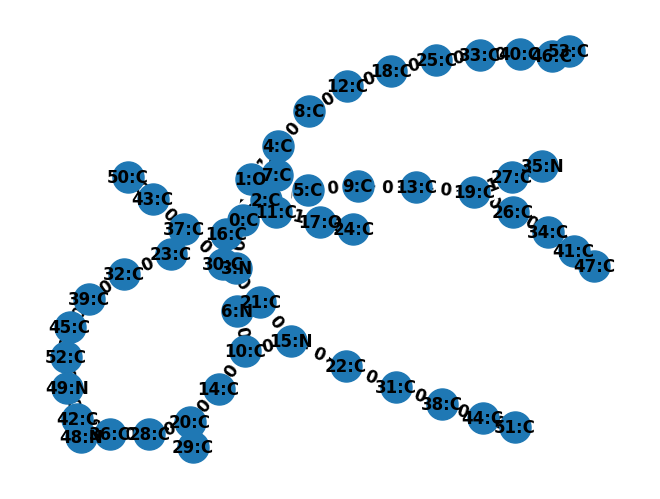

In [20]:
output, queue = full_generation()
graphX = torch_geometric_to_networkx(output)
plot_graph(graphX,  atom_conversion_type='onehot', encoding_type = 'reduced')